# 1) A little introductory brain teaser

The total number of possibilities of rolling 2 six sided dice is 36. Since the first die has 6 possibilities and the second has 6, then there are a total of 36. The only way to roll a 2 (snake eyes) is to roll 2 ones, which is only one of the 36 possible outcomes, thus giving a $\frac{1}{36}$. Roling a 7 can be achieved by roling a 1 and a 6, a 2 and a 5, a 3 and a 4, a 4 and a 3, a 5 and a 2, or a 1 and a 6, giving 6 possible ways to roll a 7, or a probability of  $\frac{6}{36}$, and thus a ratio of 1:6.

# 2) Probability of the sum of 2 six sided dice

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
die_prob = [1/6]*6

In [3]:
# Mathematical approach
convolved_data = np.convolve(die_prob, die_prob, mode = "full").tolist()

Ways to roll:
<br />2 (1): 1 and 1
<br />3 (2): 1 and 2, 2 and 1
<br />4 (3): 1 and 3, 2 and 2, 3 and 1
<br />5 (4): 1 and 4, 2 and 3, 3 and 2, 4 and 1
<br />6 (5): 1 and 5, 2 and 4, 3 and 3, 4 and 2, 5 and 1
<br />7 (6): 1 and 6, 2 and 5, 3 and 4, 4 and 3, 5 and 2, 6 and 1
<br />8 (5): 2 and 6, 3 and 5, 4 and 4, 5 and 3, 6 and 2 
<br />9 (4): 3 and 6, 4 and 5, 5 and 4, 6 and 3
<br />10 (3): 4 and 6, 5 and 5, 6 and 4
<br />11 (2): 5 and 6, 6 and 5
<br />12 (1): 6 and 6

<br />This is the same as the distribution above, and is define programatically below

In [4]:
counting_data = [1,2,3,4,5,6,5,4,3,2,1]
quotients = []
for number in counting_data:
    quotients.append(number / 36)
counting_data = quotients

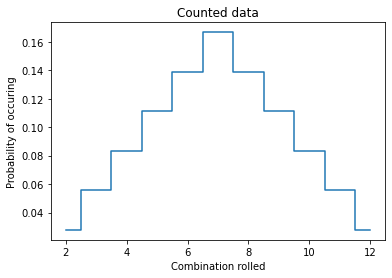

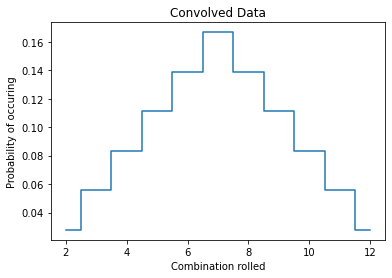

In [5]:
plt.step(x=range(2,13), y = counting_data, where = 'mid')
plt.xlabel("Combination rolled")
plt.ylabel("Probability of occuring")
plt.title("Counted data")
plt.show()

plt.step(x=range(2,13), y = convolved_data, where = 'mid')
plt.xlabel("Combination rolled")
plt.ylabel("Probability of occuring")
plt.title("Convolved Data")
plt.show()

# 3) Calculate the mean and the variance

In [6]:
mean = 0
# i+2 is used since the first value is 2, which means the itterator will always be 2 less than the combination value it is
# getting from the probability array
for i in range(11):
    mean += convolved_data[i] * (i + 2)
mean

7.0

In [7]:
dice_vals = [i for i in range(2,13)]
var = 0

for i in range(11):
    var += ((mean-dice_vals[i])**2) * convolved_data[i]
var

5.833333333333334

In [35]:
convolved_data = np.convolve(die_prob, die_prob, mode = "full").tolist()
for i in range(8):
    convolved_data = np.convolve(convolved_data, die_prob, mode = "full").tolist()
    
for i in range(len(convolved_data)):
    convolved_data[i] *= 10

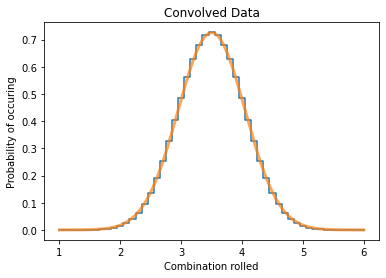

In [37]:
fig, ax = plt.subplots(1,1)

plt.step(x=np.linspace(1,6,51), y = convolved_data, where = 'mid')
x = np.linspace(1,6,10000)
ax.plot(x,scipy.stats.norm.pdf(x,loc = 3.5, scale = 0.55),linewidth = 3,alpha = 0.7)

plt.xlabel("Combination rolled")
plt.ylabel("Probability of occuring")
plt.title("Average of 10 Dice")
plt.show()

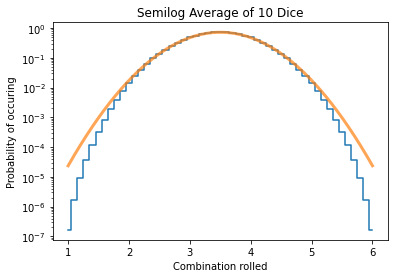

In [39]:
fig, ax = plt.subplots(1,1)
plt.step(x=np.linspace(1,6,51), y = convolved_data, where = 'mid')
x = np.linspace(1,6,10000)
ax.plot(x,scipy.stats.norm.pdf(x,loc = 3.5,scale = 0.55),linewidth = 3,alpha = 0.7)

plt.xlabel("Combination rolled")
plt.ylabel("Probability of occuring")
plt.title("Semilog Average of 10 Dice")
plt.semilogy()
plt.show()

Technically, this plot is not a Gaussian distribution. At the tails, the distribution falls away from the gaussian curve. However, it is incredibly close to a gaussian, and for many intents, it can be considered a gaussian. After infinite convolutions, this will be a gaussian, however, until then it can only become more gaussain-like.

# 5) Sum and average of an initially Gaussian